In [240]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.float_format = '{:.2f}'.format

import warnings 
warnings.filterwarnings('ignore')

In [241]:
# load data from csv file
df = pd.read_csv("cleaned_data_part_4.csv", sep=',')
df

,Comments,Type
0,វីដេអូ ពេញចឹងមកគេយល់ច្រើនហើយ អញ្ចឹងហើយគេមិនយល់...,0.00
1,៣៣៥៥ឆ្កែបើកឡាន,1.00
2,ឡានថោកហេីយចរិកអ្នកបេីកថោកទៀត GS,1.00
3,នេះជាខួររបស់តួចឹត្តអាក្រក,1.00
4,មុខពេទ្យកាល់ម៉ែត្រ,0.00
...,...,...
1730,២០៥០ ប្រទេសកម្ពុជានឹងក្លាយជាប្រទេសមួយដែលមានជាង...,NaN
1731,ផលិតកម្មថោកទាបផលិតកម្មបង្វែងដាន,NaN
1732,ល្អណាស់បើមានmemeបែបហ្នឹងច្រើន ប្រហែលអាចទាញគំនិ...,NaN
1733,បងរឿងជាច្រើនដែរបងប្អូនមិនដឹង ហើយមកតាមដានព្រឹត្...,NaN


In [242]:
# count missing values for each column
print("Missing Value: ", sum(df.isnull().sum()))
# count duplicatte values
print("Duplicated Value: ", df.duplicated().sum())

Missing Value:  1035
Duplicated Value:  0


In [243]:
# Remove duplicate
unique_records = df.drop_duplicates()
redundant_records = df[df.duplicated()]
df = df.drop_duplicates().dropna()

print("Duplicated Value: ", df.duplicated().sum())
print("Missing Values: ", df.isnull().sum().sum())

Duplicated Value:  0
Missing Values:  0


In [244]:
non_hateful = df[df['Type'] == 0]
hateful = df[df['Type'] == 1]

print(non_hateful.head(5))
print(hateful.head(5))

                                            Comments  Type
0  វីដេអូ ពេញចឹងមកគេយល់ច្រើនហើយ អញ្ចឹងហើយគេមិនយល់...  0.00
4                                 មុខពេទ្យកាល់ម៉ែត្រ  0.00
5  ចុះលេាកមិនសម្រាយចឹងតាំងពីដេីមមក យកVDOមួយផ្នែកម...  0.00
7  ខ្ញុំមើលរូបដូចជាមិនសូវអីទេណាស់តើអ្នកអីយាយចង់តែ...  0.00
8         អ្នកជេរគេនិងទូលរែកយកទៅ​ អាណិតតួរអង្គឯកណាស់  0.00
                                         Comments  Type
1                                  ៣៣៥៥ឆ្កែបើកឡាន  1.00
2                 ឡានថោកហេីយចរិកអ្នកបេីកថោកទៀត GS  1.00
3                       នេះជាខួររបស់តួចឹត្តអាក្រក  1.00
6   ញុមចង់ជេវាថាអាចុយម្រាយតែខ្លាចវាខឹងចឹងអត់ជេវិញ  1.00
10                             ប៉ះញុមវិញឡានសួរម៉ង  1.00


0.00    474
1.00    226
Name: Type, dtype: int64


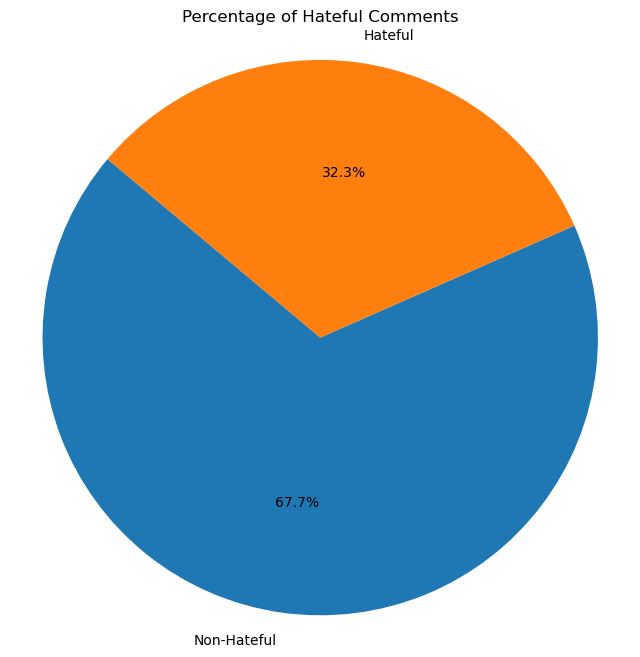

In [245]:
#write your code here 
import matplotlib.pyplot as plt
count_cmt = df["Type"].value_counts()
types = {0: 'Non-Hateful', 1: 'Hateful'}
print(count_cmt)
plt.figure(figsize=(8,8))
plt.pie(count_cmt, labels=count_cmt.index.map(types), autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Hateful Comments')
plt.axis('equal')
plt.show()

In [246]:
import re
# Function to clean comments
def remove_punc(cmt):
    pattern = re.compile(r'[។៕៖៘៙!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]')
    cleaned_text = pattern.sub('', cmt)
    cleaned_text = cleaned_text = re.sub(r'\s+', '', cleaned_text)
    return cleaned_text

df['Cleaned_cmt'] = df['Comments'].apply(remove_punc)

print(df)

                                               Comments  Type  \
0     វីដេអូ ពេញចឹងមកគេយល់ច្រើនហើយ អញ្ចឹងហើយគេមិនយល់...  0.00   
1                                        ៣៣៥៥ឆ្កែបើកឡាន  1.00   
2                       ឡានថោកហេីយចរិកអ្នកបេីកថោកទៀត GS  1.00   
3                             នេះជាខួររបស់តួចឹត្តអាក្រក  1.00   
4                                    មុខពេទ្យកាល់ម៉ែត្រ  0.00   
...                                                 ...   ...   
695                                      កុំ ហុសអាមួយណា  0.00   
696              ទស្សនះដឹកនាំបែបសក់អ្នកណាក្បាលអ្នកហ្នឹង  1.00   
697                         ចុយម៉ាយអាយួនមកខ្មែរបានតាមណា  1.00   
698                                   គាត់វង្វេងផ្លូវទេ  0.00   
1734  ខ្ញុំគិតថាចឹងវាបែបនឹងពិតមែន គួរយល់ហើយថាមិចបានគ...  0.00   

                                            Cleaned_cmt  
0     វីដេអូពេញចឹងមកគេយល់ច្រើនហើយអញ្ចឹងហើយគេមិនយល់ច្...  
1                                        ៣៣៥៥ឆ្កែបើកឡាន  
2                        ឡានថោកហេីយចរិកអ្នកបេ

In [247]:
# from khmernltk import sentence_tokenize
# from khmernltk import word_tokenize

# def tokenize(cmt):
#     words = word_tokenize(cmt, return_tokens=True)
#     sentence = ' '.join(word for word in words if word.strip())
#     return sentence

# df['Cleaned_cmt'] = df['Cleaned_cmt'].apply(tokenize)
# print(df['Cleaned_cmt'])

from khmernltk import sentence_tokenize
from khmernltk import word_tokenize

def load_suffixes(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        suffixes = [line.strip() for line in f if line.strip()]
    return suffixes

def khmer_stemmer(word, suffixes):
    for suffix in suffixes:
        if word.endswith(suffix):
            word = word[: -len(suffix)] 
            break
    return word

def tokenize_and_stemming(cmt):
    suffixes = load_suffixes("surfixes.txt")
    tokens = word_tokenize(cmt, return_tokens=True)
    stemmed_tokens = [khmer_stemmer(word, suffixes) for word in tokens]
    return ' '.join(stemmed_tokens)

df['Cleaned_cmt'] = df['Cleaned_cmt'].apply(tokenize_and_stemming)
print(df['Cleaned_cmt'])



0       វីដេអូ ពេញ ចឹង មក គេ យល់ ច្រើន  អញ្ចឹង  គេ មិន...
1                                       ៣៣៥៥ ឆ្កែ បើក ឡាន
2                 ឡាន ថោក ហេី យ ចរិក អ្នក បេីក ថោក ទៀត GS
3                           នេះ  ខួរ របស់ តួ ចឹត្ត អាក្រក
4                                    មុខ ពេទ្យ កាល់ម៉ែត្រ
                              ...                        
695                                      កុំ ហុស អាមួយ ណា
696         ទស្ស នះដឹកនាំ បែប សក់ អ្នកណា ក្បាល អ្នក ហ្នឹង
697                       ចុយ ម៉ាយ អាយួន មក ខ្មែរ  តាម ណា
698                                  គាត់ វង្វេង ផ្លូវ ទេ
1734    ខ្ញុំ គិត ថា ចឹង វា បែប នឹង ពិតមែន គួរ យល់  ថា...
Name: Cleaned_cmt, Length: 700, dtype: object


In [248]:
import json

def load_merge_map(file_path):
    # Load the merge map from the JSON file
    with open(file_path, 'r', encoding='utf-8') as file:
        return json.load(file)

def merge_word(cmt):
    # Replace each phrase in the comment
    merge_map = load_merge_map("merge_map.json")
    for phrase, merged in merge_map.items():
        cmt = re.sub(rf'\b{re.escape(phrase)}\b', merged, cmt)
    return cmt


df['Cleaned_cmt'] = df['Cleaned_cmt'].apply(merge_word)

៣៣៥៥ ឆ្កែ បើក ឡាន ឡាន ថោក ហើយ ចរិក អ្នក បេីក ថោក ទៀត GS នេះ  ខួរ របស់ តួ ចឹត្ត អាក្រក ញុម ចង់ ជេវា ថា អាចុយ ម្រាយ តែ ខ្លាច វា ខឹង ចឹង អត់ ជេវិញ ប៉ះ ញុម វិញ ឡាន សួរ ម៉ង ឡាន នឹង មនុស្ស បេីក មែន . ? ប៉ះ ចំ អ្នកកាន់ សិល បើ ប៉ះ ខ្ញុំ វិញ ខ្ញុំ អោយ វា  ដាំ ស្ពៃ នៅ PC សុី បាយ ក្រហម បើក កញ្ចក់ ស្ដោះ ទឹកមាត់ ដាក់ ក្បាល វា មួយ អាមុខ នឹង ឆ្កែ នាក់ បើក  បង ឆ្កែ ចេះ បើក ឡាន ញុម មិន ដែល ឃើញ ទេ … អា អ្នក ខម មិន នឹង អាចុយ ម្នាត៊ យ អាឆ្កួត បេីល ឡាន អត់ ចូល សាលា អញ្ចឹង ចង់ ជេអាឡាន 2T3355 នឹង ថា អា ឆ្កែ តែ ខ្ញុំ ដូច ក្រែងចិត្ត បន្តិច 🙂‍↔️ មាន ឡាន ជិះ  នៅ ថោក ទាប អា នេះ វា មិន ដែល ឃើញ សន្ទះ ក្បាល ជាប់ ក្រចក់ ឡាន វា ដឺ តែ ចឹង ខ្ញុំ មើល វីដេអូ ម្ដង  មិន ថា វីដេអូ ពេលណា ទេ ដល់ ផ្ទះ ភ្នែក ហ្នឹង អាអញ្ចឹង  ម៉ង សំណាង អត់ ប៉ះ ខ្ញុំ ប៉ះ ខ្ញុំ បុក ហ្អែង ថែម អី បោះ លុយ កណ្តាល មុខ បណ្តោយ ។ បើសិប ខ្ញុំ មាន ឡាន ប៉ះ ខ្ញុំ វិញ បុក  គ្មាន ទុក ទេ ម៉ា អា ឆ្កែ សំណាង  ឡាន តូច ដូចគ្នា ប៉ះ ឡាន អញ វិញ កាល ឆ្នាំ 2022 ខែ 9ឡាន 2t3355  ក៍ បិះ ត្រូវ ជុំ ក្រឡង់ របស់ មេ ខ្ញុំ ដែរ នៅ គល់ ស្ពាន ផ្សារ ដី ហុយ ហេតុការ ដូចគ្នា ចឹង ដែរ ប៉ុន្ត

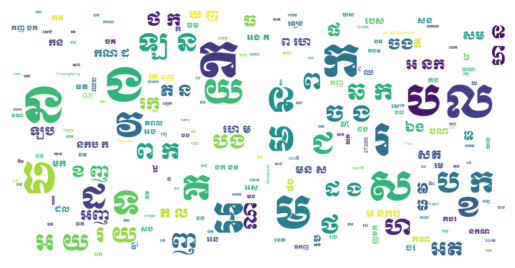

In [249]:
#write your code here
from wordcloud import WordCloud, ImageColorGenerator

neg_texts = df[df['Type'] == 1]

text = neg_texts['Cleaned_cmt'].to_string()

text = ' '.join(neg_texts['Cleaned_cmt'])

print(text)

khmer_font_path = "KhmerOS_muollight.ttf"

# Create and generate a word cloud image:
wordcloud = WordCloud(
    font_path=khmer_font_path,
    width=800,
    height=400,
    background_color="white",
    max_words=200,  # Limit the number of words to display
    max_font_size=80,  # Adjust font size for readability
    colormap="viridis"  # Choose a color palette
).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [250]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [251]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Cleaned_cmt'], df['Type'], test_size=0.2, random_state=42)

# Vectorize the text using CountVectorizer
vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\S+')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Make predictions
y_pred = model.predict(X_test_vec)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8285714285714286
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.91      0.87        90
         1.0       0.81      0.68      0.74        50

    accuracy                           0.83       140
   macro avg       0.82      0.80      0.81       140
weighted avg       0.83      0.83      0.82       140



In [252]:
# Predict hate speech for new Khmer text
def predict_hate_speech_khmer(cmt):
    cmt = remove_punc(cmt)
    cmt = tokenize_and_stemming(cmt)
    comment_vec = vectorizer.transform([cmt])
    print(cmt)
    print(comment_vec)
    prediction = model.predict(comment_vec)
    return "Hate Speech" if prediction[0] == 1 else "Non-Hate Speech"

# Test example
new_comment = "បងនិយាយបានឆ្កួតល្អណាស់​ ខ្ញំុសរសើរបង​​ បងពិតជាឆ្កួតរកលេខដាក់ក្មានមែន"
print(predict_hate_speech_khmer(new_comment))

បង និយាយ  ឆ្កួត ល្អ ណាស់ ខ្ញំុ សរសើរ បង បង ពិត ឆ្កួត រក លេខ ដាក់ ក្មាន មែន
  (0, 394)	2
  (0, 469)	1
  (0, 505)	1
  (0, 667)	1
  (0, 691)	3
  (0, 841)	1
  (0, 963)	1
  (0, 1021)	1
  (0, 1082)	1
  (0, 1102)	1
  (0, 1165)	1
Non-Hate Speech
